<img src="https://astanait.edu.kz/wp-content/uploads/2020/05/aitu-logo-2-600x315.png" width="300" height="222" >
<br>
<br>  
<p style="text-align: center;  font-size: 20px;"> Faculty of Information Technology </p>
<p style="text-align: center;  font-size: 20px;"> Big Data Analysis </p>
    
<br>
<br>   
<br>
<br>

<h1 style="text-align: center"> Data Science Programming 2 (Python) </h1>
<h1 style="text-align: center"> Final Project </h1> 

<br>
<br>


<h3 style="text-align: right">Group:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">BDA-2008</h3> 

<h3 style="text-align: right">Prepared by:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Assylnur Lesken,</h3>   
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Yerkegul Assaiyn</h3>

<h3 style="text-align: right">Instructor:</h3><p style="text-align: right; font-size: 15px; margin-right: 49px;">  Kaisar Mussalim</p>

<br>
<br>

<p style="text-align: center; font-size: 18px; margin-right: 49px;">Nur-Sultan, 2022</h3>
<br>
<br>
<br>

## Tasks:
### Task 1 - Classification with prepared dataset (75% of mark)
### Task 2 - Clustering with any dataset (25% of mark)

## Marking scheme 
For Final:
1. Data and task presentation - 10%
2. Data Preprocessing - 20%
3. Model (variety, complexity, tunning) - 20%
4. Imbalance (approaching this issue) - 20%
5. Code quality - 10%
6. Results and Defence - 20%

*Note: add comments and description of the approaches that you use, for example, for resolving the problem of imbalanced data. Write descriptions of techniques that you apply, and you should understand them as well.*

## Task 1:
Мы постоянно работаем над улучшением качества своих продуктов и услуг для роста абонентской базы и минимизации оттока. В своей работе мы используем персональный подход к абонентам.
Для снижения оттока компания использует разные каналы коммуникации с клиентами. Каждое предложение должно быть адресовано определенной целевой группе. В этом задании вам предстоит по имеющимся данным попытаться определить абонентов, которые уйдут в отток.

**Что имеем**

Анонимизированные данные об абонентах: язык обслуживания абонента, тарифный план, информация об объёмах потребления различных услуг оператора и другие.
В файле data.csv содержится информация для построения модели.
Формат строк: 3 категориальных признака (C1, C2, C3), 23 числовых признака (N1, …, N23) и целевая переменная — TARGET.

**Что делать**

Описать этапы построения модели, построить модель, оценить ее и рассказать бизнесу как ее применять, то есть нужна бизнес-интерпретация. 

*Note: this is how the task was originally structured, you can use it as a guidance.*

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import  StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

import sklearn.linear_model as skl_lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# import lightgbm as lgb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve,auc
from sklearn.metrics import fbeta_score, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('task1.csv', sep=';', decimal=",")
df.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,...,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,...,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,...,28,17,5,69,23,86,28,0,0,0


In [4]:
df.shape

(514009, 27)

There are 27 columns and close to 514009 records.

In [5]:
df.TARGET.value_counts()

0    488665
1     25344
Name: TARGET, dtype: int64

In [6]:
df.TARGET.value_counts()/len(df)

0    0.950693
1    0.049307
Name: TARGET, dtype: float64

Proportion of Imbalanced Data: 95% & 5%

In [7]:
df.isnull().sum()

C1        0
C2        0
C3        0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
N7        0
N8        0
N9        0
N10       0
N11       0
N12       0
N13       0
N14       0
N15       0
N16       0
N17       0
N18       0
N19       0
N20       0
N21       0
N22       0
N23       0
TARGET    0
dtype: int64

Here, we see that there are no null values.

In [8]:
def unique_vals(df):
    res = pd.DataFrame()
    cols = []
    nunique = []
    unique = []
    datatype = []
    num_of_nan = []
    for column in df:
        cols.append(column)
        nunique.append(df[column].nunique() )
        unique.append( df[column].unique() )
        datatype.append(df[column].dtype)
        num_of_nan.append(df[column].isnull().sum())
        
    
    res['col_name'] = cols
    res['number of unique values'] = nunique
    res['unique values'] = unique
    res['dtype'] = datatype
    res['Number_of_nan'] = num_of_nan

    return res.sort_values('number of unique values')

We need to look through all the columns to find out which ones are repeated and which ones are not needed for our project.

In [9]:
unique_vals(df)

,col_name,number of unique values,unique values,dtype,Number_of_nan
26,TARGET,2,"[0, 1]",int64,0
2,C3,3,"[33, 31, 32]",int64,0
25,N23,36,"[0, 3, 2, 1, 5, 4, 13, 8, 9, 7, 6, 12, 65, 20,...",int64,0
24,N22,49,"[0, 26, 2, 12, 4, 16, 6, 14, 3, 1, 10, 8, 22, ...",int64,0
1,C2,64,"[323531, 343835, 343433, 313435, 343439, 3434,...",int64,0
19,N17,225,"[0, 6, 1, 5, 17, 4, 30, 3, 16, 7, 2, 12, 21, 2...",int64,0
18,N16,236,"[0, 5, 18, 4, 17, 28, 2, 3, 10, 7, 9, 14, 12, ...",int64,0
21,N19,330,"[7, 12, 18, 56, 23, 104, 19, 47, 15, 33, 53, 6...",int64,0
17,N15,415,"[7, 18, 24, 57, 28, 121, 23, 77, 15, 53, 36, 6...",int64,0
23,N21,416,"[7, 18, 24, 57, 28, 121, 23, 77, 15, 53, 36, 6...",int64,0


In [10]:
df.drop(columns=['C1'], inplace=True)

We determined that the number of unique values of 'C1' equal to number of rows.

We saw that there are columns with zeros in the dataset. And we considered the case when these zeros can be null values. Therefore, we calculated the percentage of zeros in each column. You can see the result here.  The percentage of zeros:
* N1 :  0.63
* N12 :  0.98
* N13 :  0.98
* N22 :  0.988
* N23 :  0.98

Based on this, we decided to remove the columns with the highest percentage of zeros.

# EDA

In [11]:
df

,C2,C3,N1,N2,N3,N4,N5,N6,N7,N8,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,24.83,...,7,0,0,36,7,36,7,0,0,0
1,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,206.03,...,18,5,6,52,12,57,18,0,0,0
2,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,38.80,...,24,18,6,46,18,64,24,0,0,0
3,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,120.07,...,57,4,1,142,56,148,57,0,0,0
4,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,373.27,...,28,17,5,69,23,86,28,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514004,313339,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
514005,313339,31,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.00,...,1,0,1,0,0,0,1,0,0,0
514006,343637,31,0.00,0.00,0.00,0.00,1.27,0.00,1.27,0.00,...,1,0,1,0,0,0,1,0,0,0
514007,313339,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Correlation of variables')

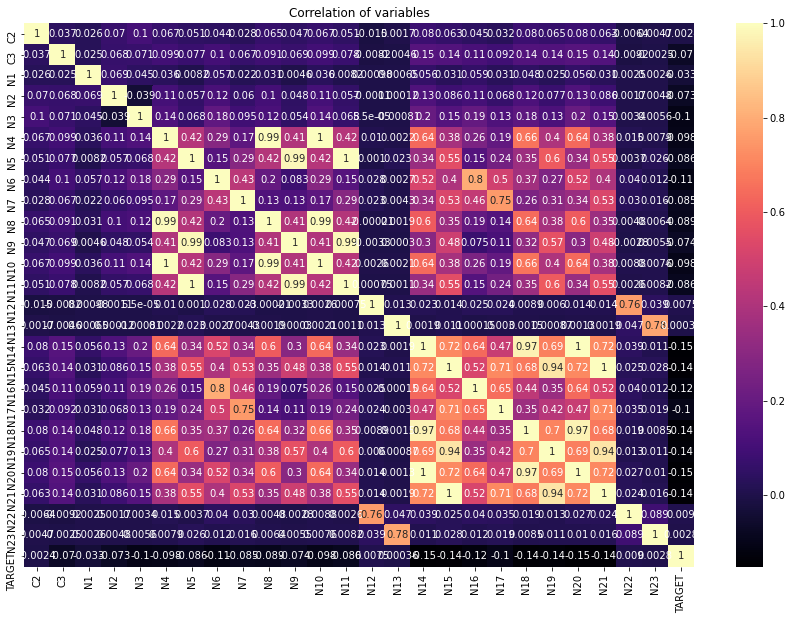

In [12]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='magma')
ax.set_title("Correlation of variables")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

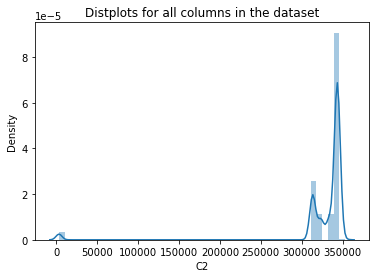

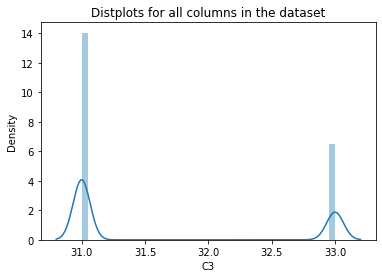

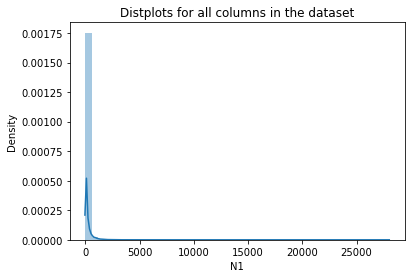

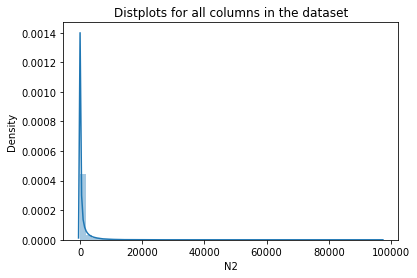

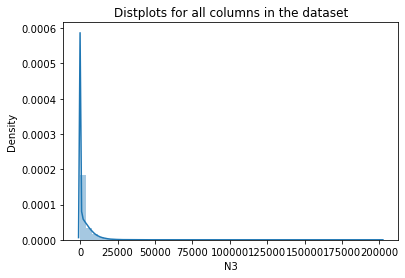

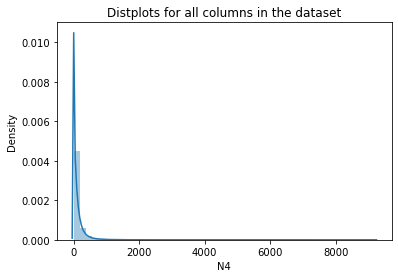

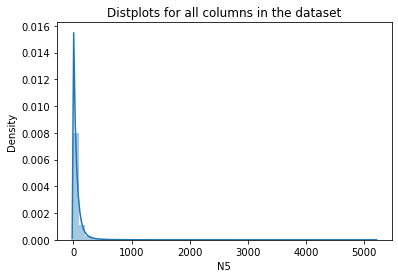

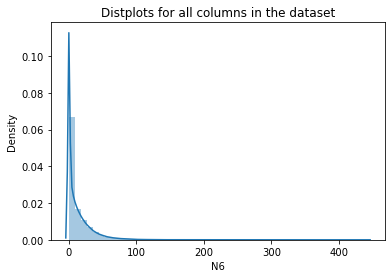

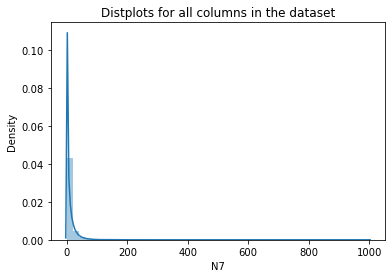

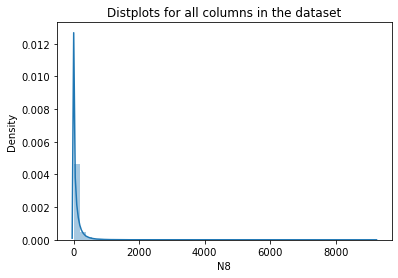

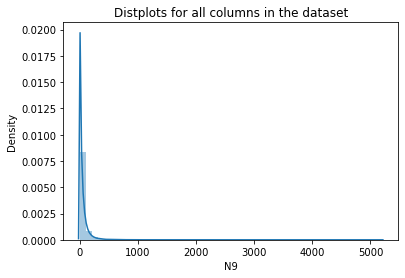

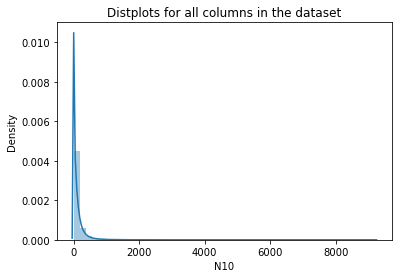

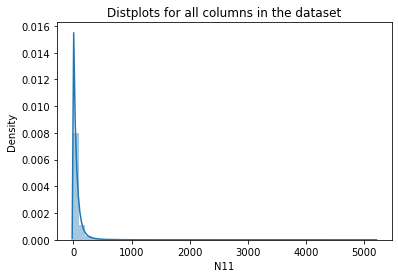

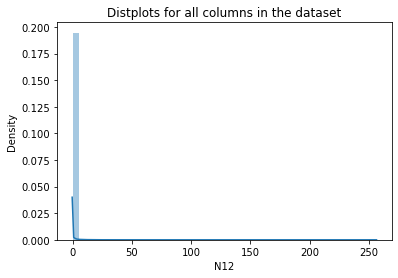

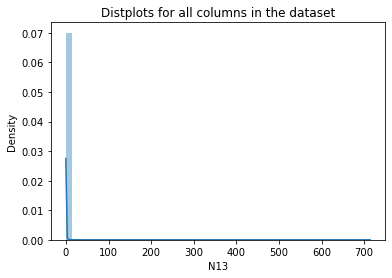

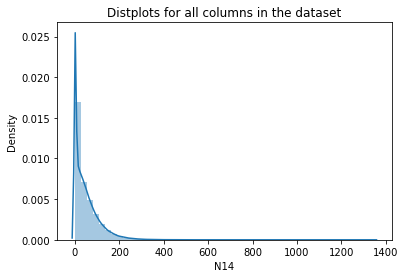

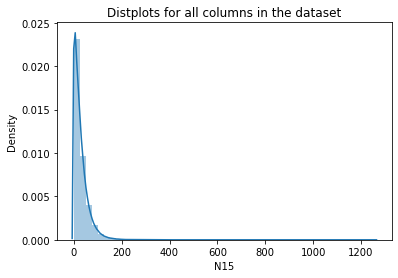

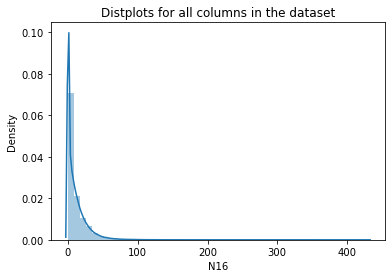

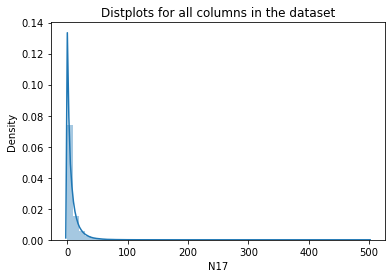

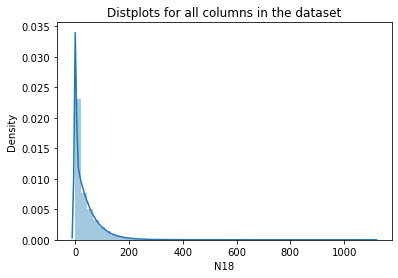

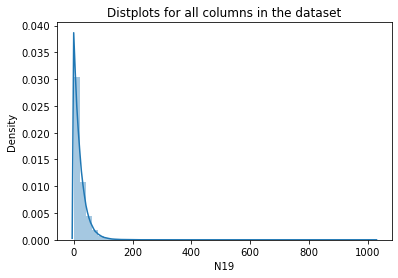

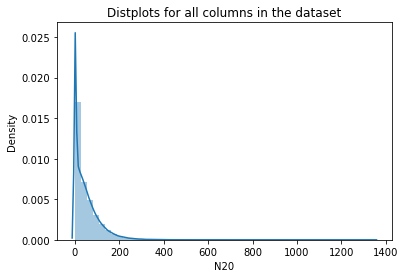

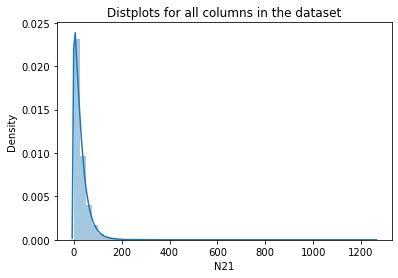

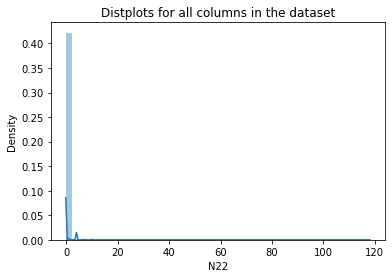

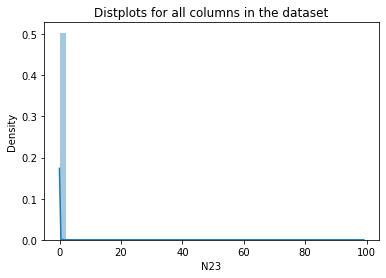

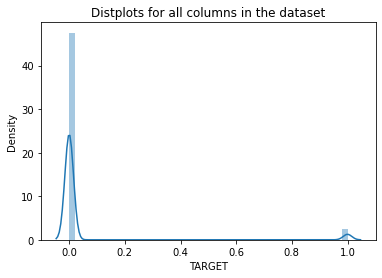

In [13]:
# distplots
for column in df.columns:
    plt.figure()
    sns.distplot(df[column])
    plt.title("Distplots for all columns in the dataset")

We found out that some columns look different than others and we will work with them in the future. For example, N20.

<ipython-input-14-132d0336db6c>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


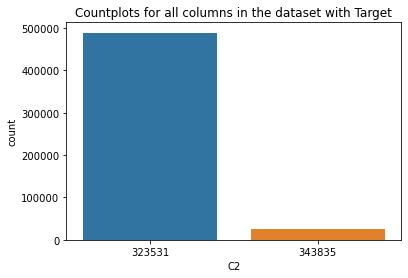

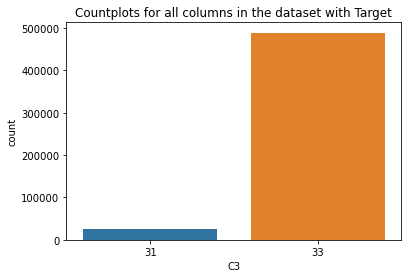

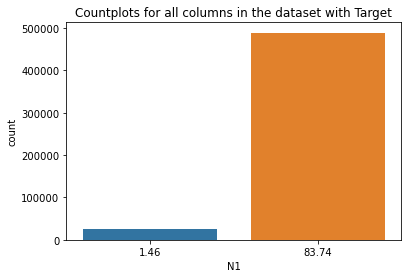

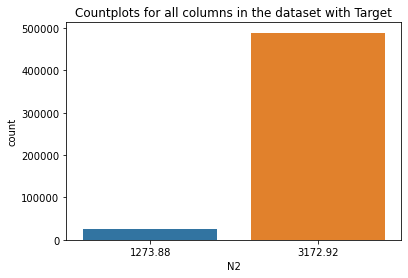

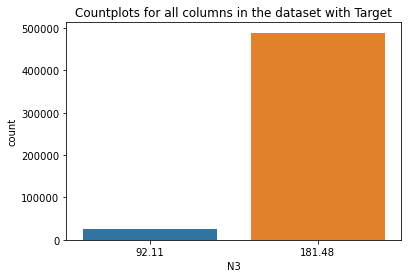

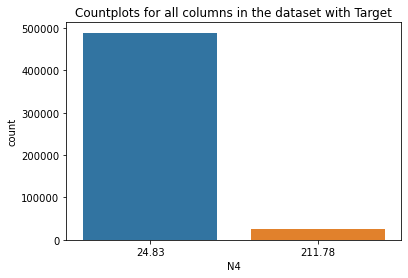

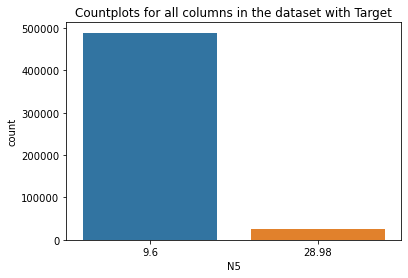

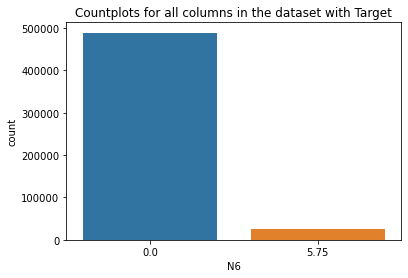

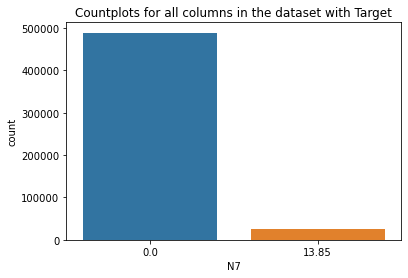

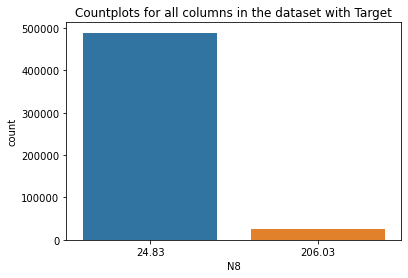

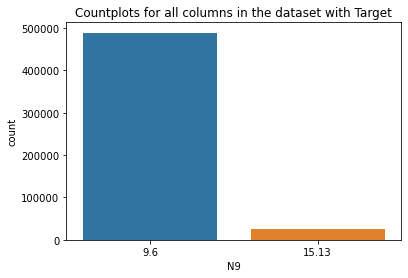

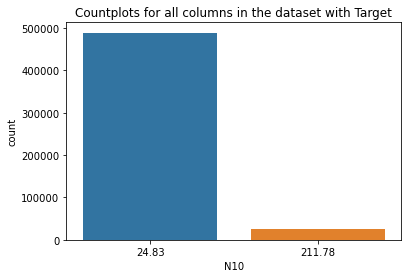

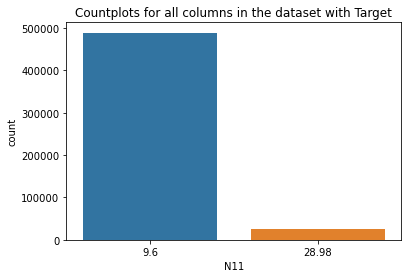

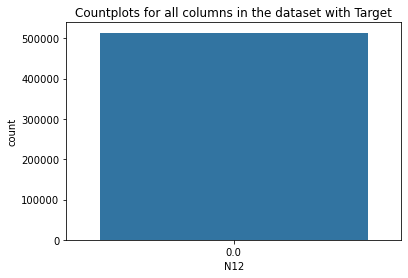

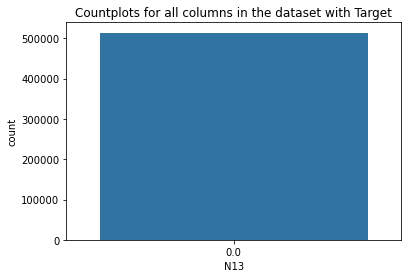

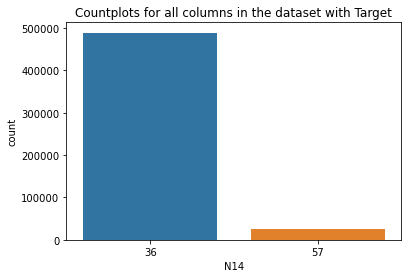

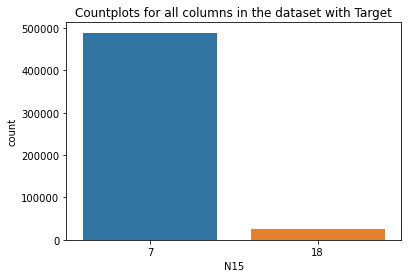

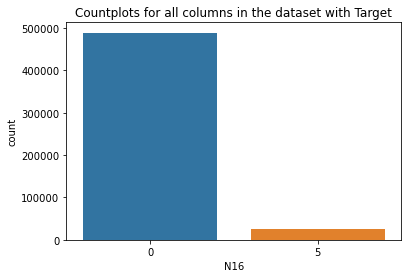

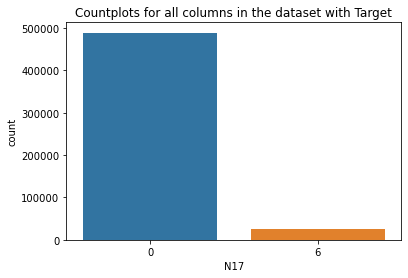

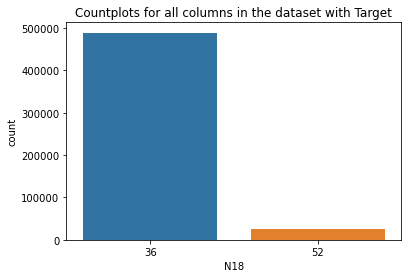

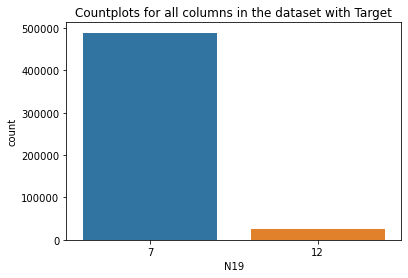

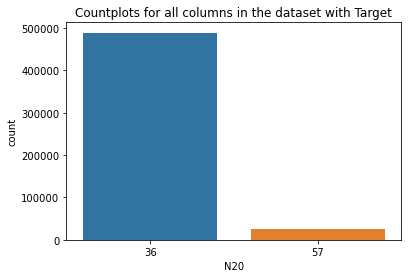

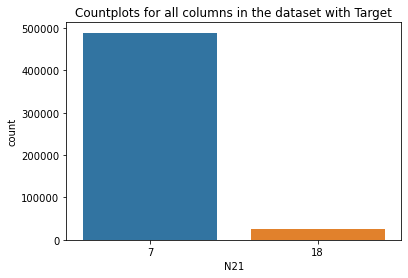

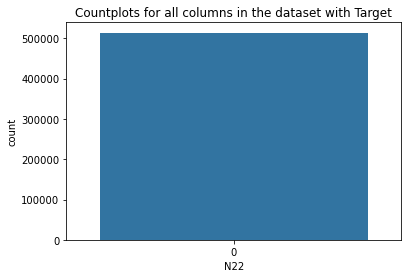

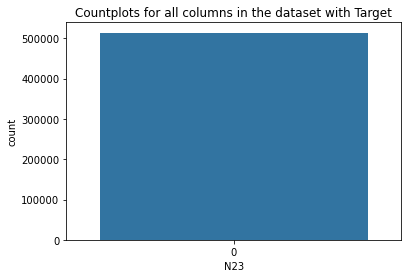

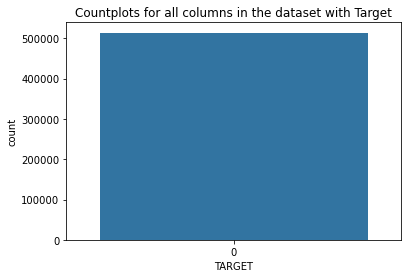

In [14]:
# countplots
for column in df.columns:
    plt.figure()
    sns.countplot(data=df[column], x=df["TARGET"])
    plt.title("Countplots for all columns in the dataset with Target")

We determined that in columns N2, N3 tarhet 0 is larger than target 1. And in other columns like N18, N14=N20, N8, N4=N10 target 0 is large in comparison with other columns. Also we determined that a number of target 0 in columns N14 and N20 similar.

<ipython-input-15-8da24986c226>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


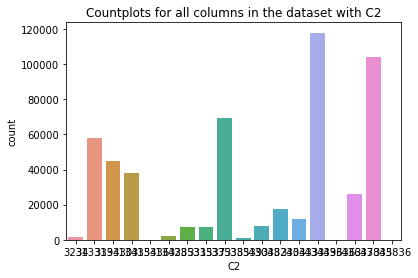

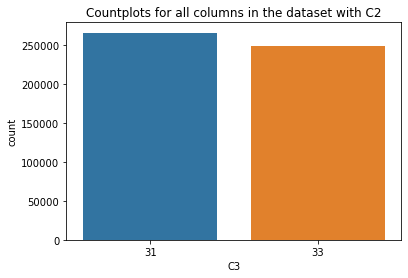

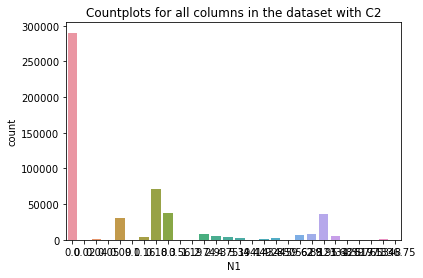

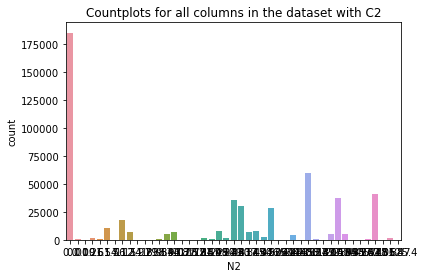

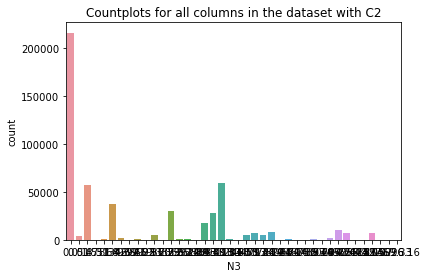

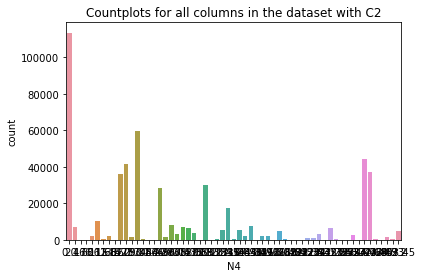

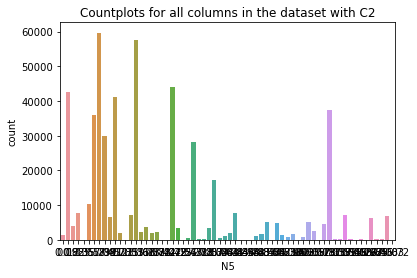

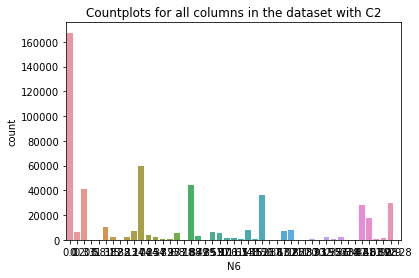

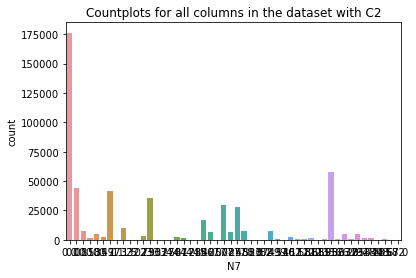

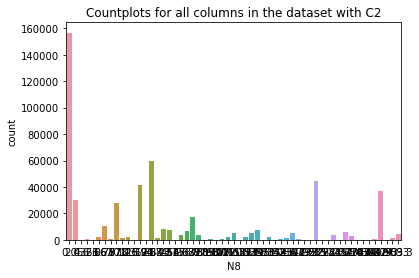

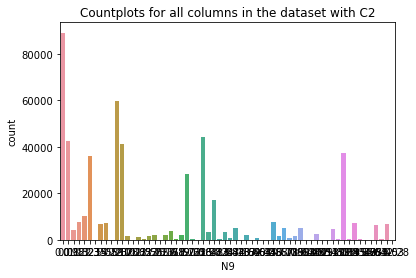

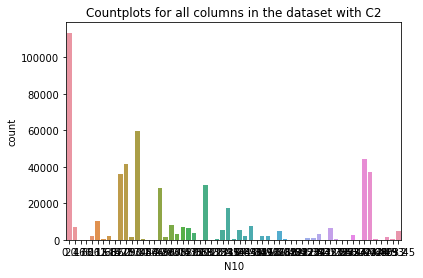

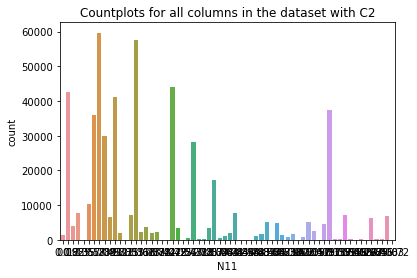

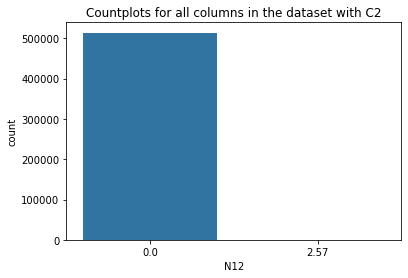

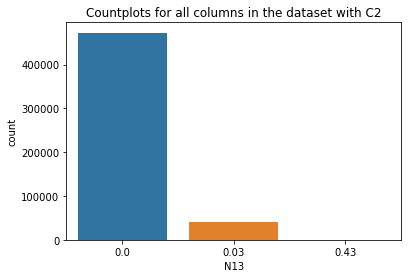

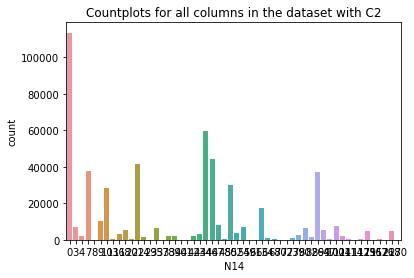

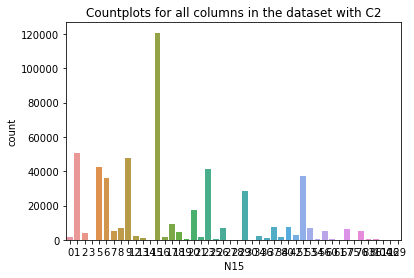

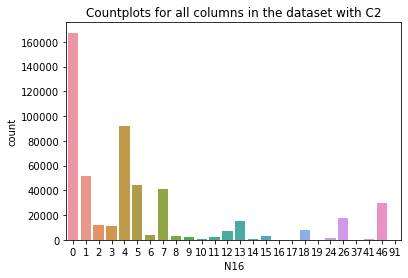

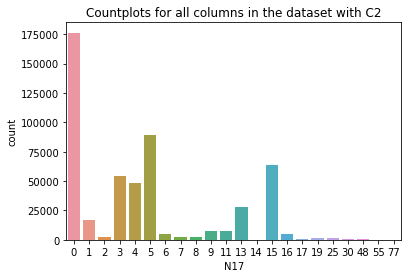

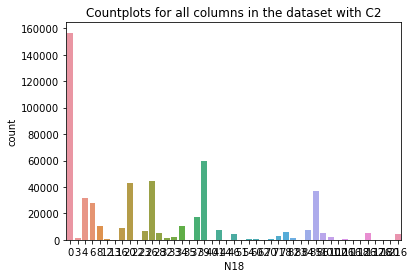

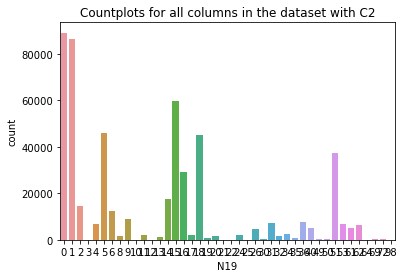

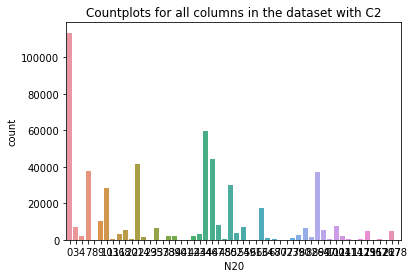

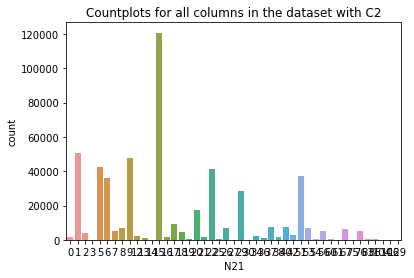

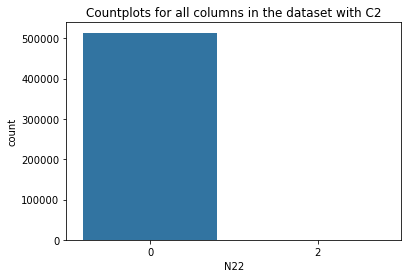

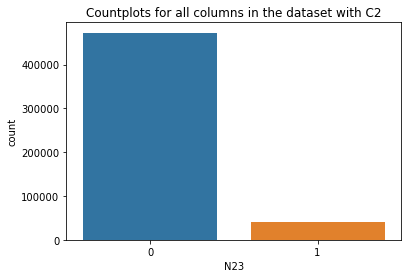

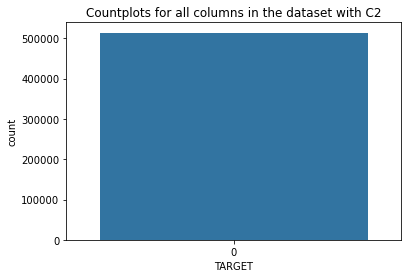

In [15]:
# countplots
for column in df.columns:
    plt.figure()
    sns.countplot(data=df[column], x=df["C2"])
    plt.title("Countplots for all columns in the dataset with C2")

<ipython-input-16-d42d2b5f1895>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


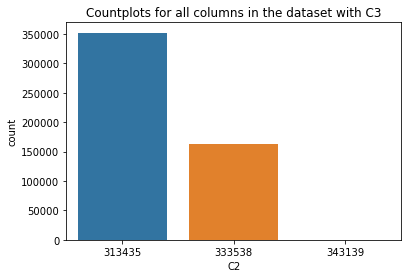

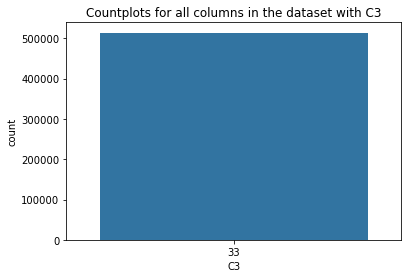

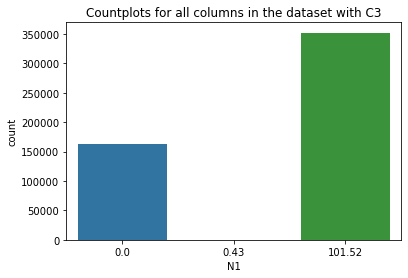

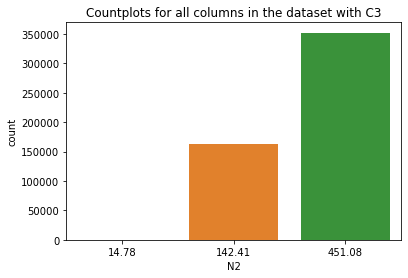

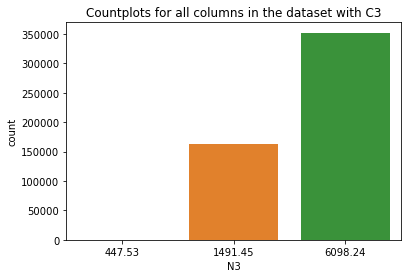

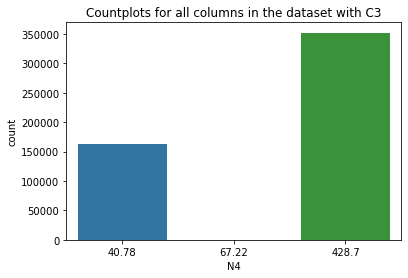

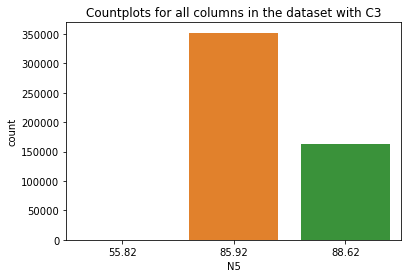

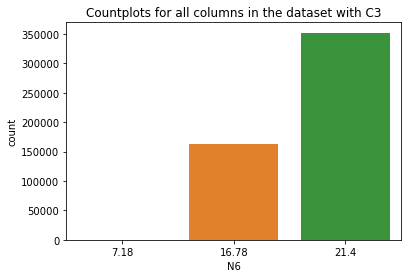

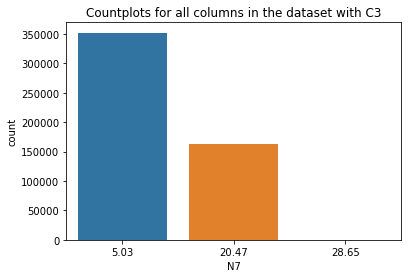

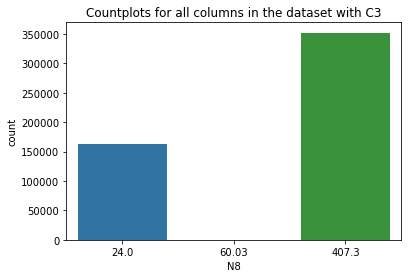

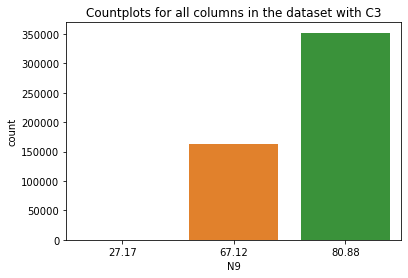

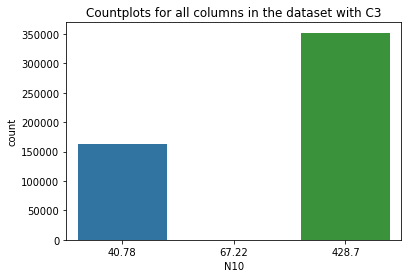

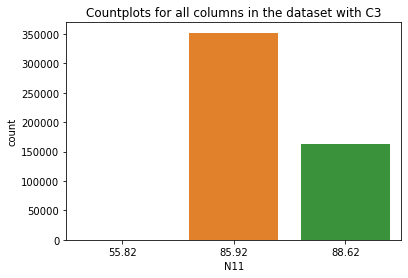

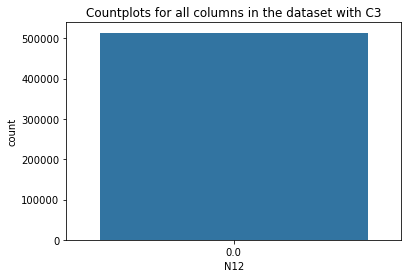

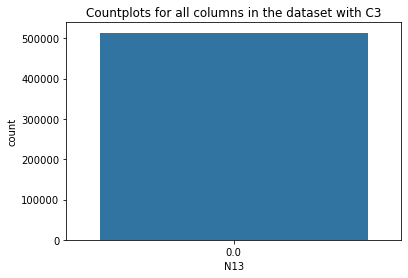

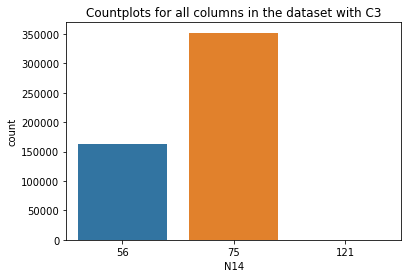

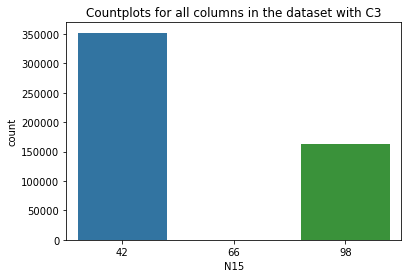

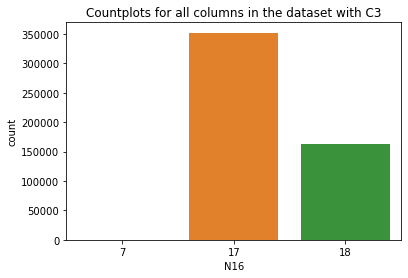

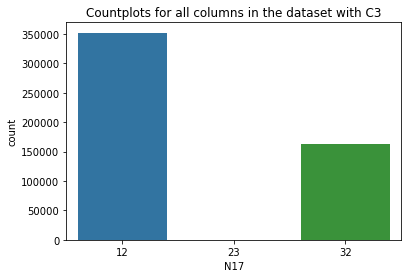

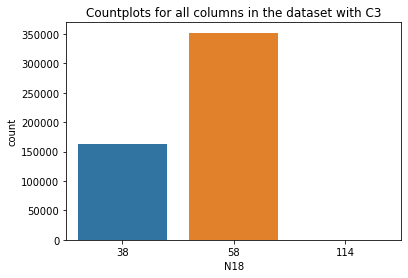

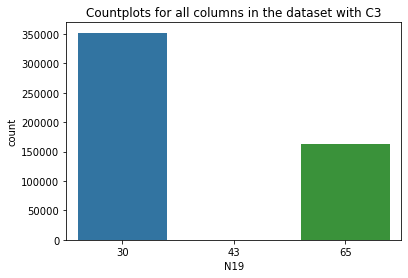

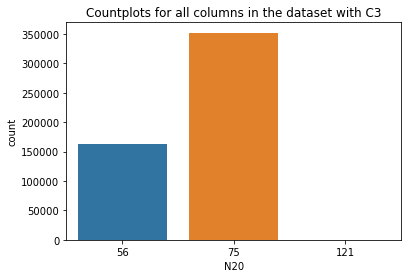

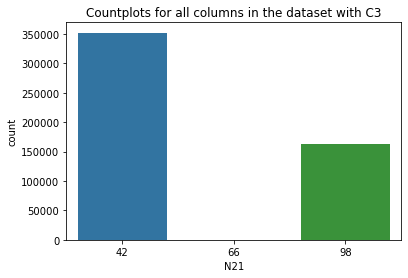

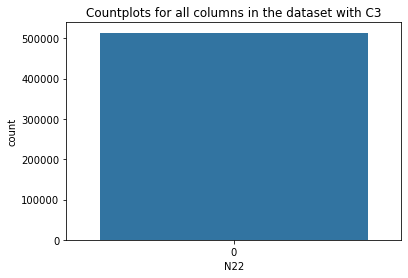

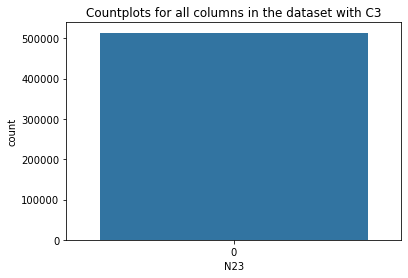

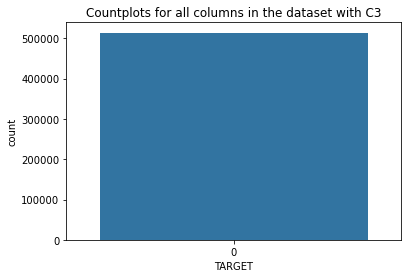

In [16]:
# countplots
for column in df.columns:
    plt.figure()
    sns.countplot(data=df[column], x=df["C3"])
    plt.title("Countplots for all columns in the dataset with C3")

Here we decided that in the numeric columns the C3 = 33 which is blue is the most common. Then in 32 green and 31 orange colors.

# Feature Selection

In [21]:
y = df[['TARGET']]
X = df.drop('TARGET', axis=1)

We choose a column 'TARGET' as target and remove it from dataset to .

In [22]:
categorical = [c for c in df if c[0]=='C']
numerical =  [c for c in df if c[0]=='N']

scaler = StandardScaler()

# Standardize numeric features
df[numerical] = scaler.fit_transform(df[numerical] )


# factorize categorical vars
for i in categorical:
    df[i] = df[i].factorize()[0]

We standardize all numeric features using StandardScaler and then factorize all categorical vars.

In [23]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfpvals = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScPvals = pd.concat([featureScores,dfpvals],axis=1)

featureScPvals.columns = ['Specs','Score', 'P vals']  #naming the dataframe columns


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We select best features using SelectKBest and then concat two dataframes for better visualization.

In [24]:
featureScPvals.sort_values('Score', ascending=False)

,Specs,Score,P vals
21,N20,12132.202938,0.000000e+00
15,N14,12104.665022,0.000000e+00
22,N21,10901.557898,0.000000e+00
16,N15,10891.191712,0.000000e+00
19,N18,10385.606239,0.000000e+00
20,N19,9688.773866,0.000000e+00
17,N16,7558.313968,0.000000e+00
7,N6,6614.280537,0.000000e+00
4,N3,5562.823297,0.000000e+00
18,N17,5273.341830,0.000000e+00


In [25]:
featureScPvals[featureScPvals['P vals']==0.0]

,Specs,Score,P vals
0,C2,1756.429137,0.0
1,C3,2505.715210,0.0
3,N2,2742.704338,0.0
4,N3,5562.823297,0.0
5,N4,5006.224919,0.0
6,N5,3803.514022,0.0
7,N6,6614.280537,0.0
8,N7,3781.546269,0.0
9,N8,4124.491102,0.0
10,N9,2820.875964,0.0


In [26]:
features = featureScPvals[featureScPvals['P vals']==0.0]['Specs'].tolist()

So this is our all features.

In [27]:
features

['C2',
 'C3',
 'N2',
 'N3',
 'N4',
 'N5',
 'N6',
 'N7',
 'N8',
 'N9',
 'N10',
 'N11',
 'N14',
 'N15',
 'N16',
 'N17',
 'N18',
 'N19',
 'N20',
 'N21']

# ML

Type 1 error we say that the client will no longer use the company's services (1), but he remains (0).

***Type 2 error*** when we say that client will stay with company(0), but in fact refuses the services of the company (1). It will be bad for the комапни. That is, we should have less ***Type 2 error(FN)***. And if we have less FN, then the importance of the ***recall*** increases. 

$$Recall = TP/(TP+FN)$$

This means that in place F1 we need to take into account ***F2***, where the recall has a higher weight than precision.

ROC curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall curves should be used when there is a moderate to large class imbalance. The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance.

Thus, ***Precision-Recall*** curves are more important than ROC curves in case of imbalance.

In [ ]:
y = df[['TARGET']]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=777)

In [ ]:
# Create confusion matrix
def conf_matrix(y_test,  y_pred):
    conf_m = pd.DataFrame(confusion_matrix(y_test,  y_pred), 
                               columns=[" Predicted NO", " Predicted YES"],
                               index=[" Actual NO", " Actual YES"])
    return conf_m

## **Without resampiling**

### Logistic Regression

In [ ]:
clf = skl_lm.LogisticRegression( )
clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test)                       

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');

f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)

mlr = ['Standard logistic regression']
plr_auc = [pr_auc_lr]
rlr_auc = [roc_auc_lr]
f2lr = [f2_lr]

In [ ]:
clf = skl_lm.LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test) 

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');
f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)


mlr.append('Weighted logistic regression(‘balanced’)')
plr_auc.append(pr_auc_lr)
rlr_auc.append(roc_auc_lr)
f2lr.append(f2_lr)

### Decision tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train.values.ravel())

y_pred = tree.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');


f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)

mtree = ['Standard Decision tree']
ptree_auc = [pr_auc_tree]
rtree_auc = [roc_auc_tree]
f2tree = [f2_tree]

In [ ]:
tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(X_train, y_train.values.ravel())

y_pred = tree.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');

f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)

mtree.append('Weighted Decision tree(‘balanced’)')
ptree_auc.append(pr_auc_tree)
rtree_auc.append(roc_auc_tree)
f2tree.append(f2_tree)

### Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');
f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)

mrf = ['Standard Random Forest']
prf_auc = [pr_auc_rf]
rrf_auc = [roc_auc_rf]
f2rf = [f2_rf]

In [ ]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');

f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)

mrf.append('Weighted Random Forest(‘balanced’)')
prf_auc.append(pr_auc_rf)
rrf_auc.append(roc_auc_rf)
f2rf.append(f2_rf)

### XGBoost

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train.values.ravel()) 

# Predict the Test set results
y_pred = model.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = model.predict_proba(X_test)

fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

pre_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_xgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of XGBoost');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of XGBoost');

f2_xgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_xgb)

mx = ['Standard XGBoost']
px_auc = [pr_auc_xgb]
rx_auc = [roc_auc_xgb]
f2x = [f2_xgb]

In [ ]:
# estimate a value for the scale_pos_weight xgboost hyperparameter

# As such, the scale_pos_weight can be used to train a class-weighted or cost-sensitive 
# scale_pos_weight = total_negative_examples / total_positive_examples

# estimate scale_pos_weight value
estimate = y_train.value_counts()[0] / y_train.value_counts()[1]
print('Estimate: %.3f' % estimate)

This will give classification errors made by the model on the minority class (positive class) 19.272 times more impact

In [ ]:
model = XGBClassifier(scale_pos_weight= 19.272)

model.fit(X_train, y_train.values.ravel()) 
# Predict the Test set results
y_pred = model.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = model.predict_proba(X_test)

fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

pre_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_xgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of XGBoost');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of XGBoost');
f2_xgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_xgb)

mx.append('Weighted XGBoost for Class Imbalance')
px_auc.append(pr_auc_xgb)
rx_auc.append(roc_auc_xgb)
f2x.append(f2_xgb)

### Lightgbm

In [ ]:
lb = lgb.LGBMClassifier()
lb.fit(X_train, y_train.values.ravel()) 
# Predict the Test set results
y_pred = lb.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = lb.predict_proba(X_test)

fpr_lgb, tpr_lgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

pre_lgb, rec_lgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Lightgbm');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Lightgbm');
f2_lgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lgb)

mlg = ['Standard Lightgbm']
plg_auc = [pr_auc_lgb]
rlg_auc = [roc_auc_lgb]
f2lg = [f2_lgb]

In [ ]:
lb = lgb.LGBMClassifier(scale_pos_weight= 19.272)
lb.fit(X_train, y_train.values.ravel()) 
# Predict the Test set results
y_pred = lb.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = lb.predict_proba(X_test)

fpr_lgb, tpr_lgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

pre_lgb, rec_lgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Lightgbm');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Lightgbm');
f2_lgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lgb)

mlg.append('Weighted LGBM for Class Imbalance')
plg_auc.append(pr_auc_lgb)
rlg_auc.append(roc_auc_lgb)
f2lg.append(f2_lgb)

We have performed data resampling on the bootstrap sample in order to explicitly change the class distribution.
## **Random Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy="not minority")
X_rus, y_rus = rus.fit_resample(X_train, y_train)

y_rus.value_counts()

### Logistic Regression

In [ ]:
clf = skl_lm.LogisticRegression()
clf.fit(X_rus, y_rus.values.ravel()) 

y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test) 

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');
f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)


mlr.append('Random Undersampling')
plr_auc.append(pr_auc_lr)
rlr_auc.append(roc_auc_lr)
f2lr.append(f2_lr)

### Decision tree

In [ ]:
# tree = DecisionTreeClassifier()

# tree_params = { 
#                "max_depth": range(1, 30), 
#                "max_features": range(1, 14),
# }

# tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, scoring='recall')

In [ ]:
# tree_grid.fit(X_rus, y_rus.values.ravel())
# tree_grid.best_params_

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_rus, y_rus.values.ravel())

y_pred = tree.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');

f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)

mtree.append('Random Undersampling')
ptree_auc.append(pr_auc_tree)
rtree_auc.append(roc_auc_tree)

f2tree.append(f2_tree)

### Random Forest

In [ ]:
# rfc=RandomForestClassifier()

# param_grid = { 
#     'n_estimators': [100, 200, 500],
#     'max_features': range(1, 14),
#     'max_depth' :  range(1, 30, 3),
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='recall', cv=5)

In [ ]:
# CV_rfc.fit(X_rus, y_rus.values.ravel())
# CV_rfc.best_params_

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_rus, y_rus.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');



f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)

mrf.append('Random Undersampling')
prf_auc.append(pr_auc_rf)
rrf_auc.append(roc_auc_rf)
f2rf.append(f2_rf)

### XGBoost

In [ ]:
model = XGBClassifier()
model.fit(X_rus, y_rus.values.ravel())

# Predict the Test set results
y_pred = model.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = model.predict_proba(X_test)

fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

pre_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_xgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of XGBoost');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of XGBoost');
f2_xgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_xgb)

mx.append('Random Undersampling')
px_auc.append(pr_auc_xgb)
rx_auc.append(roc_auc_xgb)
f2x.append(f2_xgb)

### LGBM

In [ ]:
lb = lgb.LGBMClassifier()
lb.fit(X_rus, y_rus.values.ravel())
# Predict the Test set results
y_pred = lb.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = lb.predict_proba(X_test)

fpr_lgb, tpr_lgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

pre_lgb, rec_lgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Lightgbm');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Lightgbm');
f2_lgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lgb)

mlg.append('Random Undersampling')
plg_auc.append(pr_auc_lgb)
rlg_auc.append(roc_auc_lgb)

f2lg.append(f2_lgb)

## **Random Over Sampling**



In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_ros, y_ros = ros.fit_resample(X_train, y_train)

y_ros.value_counts()

### Logistic Regression

In [ ]:
clf = skl_lm.LogisticRegression()
clf.fit(X_ros, y_ros.values.ravel()) 

y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test) 

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');
f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)

mlr.append('Random Oversampling')
plr_auc.append(pr_auc_lr)
rlr_auc.append(roc_auc_lr)

f2lr.append(f2_lr)

### Decision tree

In [ ]:
tree = DecisionTreeClassifier( )
tree.fit(X_ros, y_ros.values.ravel())

y_pred = tree.predict(X_test)
print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');
f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)

mtree.append('Random Oversampling')
ptree_auc.append(pr_auc_tree)
rtree_auc.append(roc_auc_tree)
f2tree.append(f2_tree)

### Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_ros, y_ros.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');
f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)

mrf.append('Random Oversampling')
prf_auc.append(pr_auc_rf)
rrf_auc.append(roc_auc_rf)

f2rf.append(f2_rf)

### XGBoost

In [ ]:
model = XGBClassifier()
model.fit(X_ros, y_ros.values.ravel())

# Predict the Test set results
y_pred = model.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = model.predict_proba(X_test)

fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

pre_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_xgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of XGBoost');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of XGBoost');
f2_xgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_xgb)

mx.append('Random Oversampling')
px_auc.append(pr_auc_xgb)
rx_auc.append(roc_auc_xgb)
f2x.append(f2_xgb)

### LGBM

In [ ]:
lb = lgb.LGBMClassifier()
lb.fit(X_ros, y_ros.values.ravel())
# Predict the Test set results
y_pred = lb.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = lb.predict_proba(X_test)

fpr_lgb, tpr_lgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

pre_lgb, rec_lgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Lightgbm');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of LLightgbm');
f2_lgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lgb)

mlg.append('Random Oversampling')
plg_auc.append(pr_auc_lgb)
rlg_auc.append(roc_auc_lgb)

f2lg.append(f2_lgb)

## **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

y_smote.value_counts()

### Logistic Regression

In [ ]:
clf = skl_lm.LogisticRegression()
clf.fit(X_smote, y_smote.values.ravel()) 

y_pred = clf.predict(X_test)

print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = clf.predict_proba(X_test) 

fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lr = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Logistic Regression');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Logistic Regression');
f2_lr = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lr)

mlr.append('SMOTE')
plr_auc.append(pr_auc_lr)
rlr_auc.append(roc_auc_lr)

f2lr.append(f2_lr)

### Decision tree

In [ ]:
tree = DecisionTreeClassifier( )
tree.fit(X_smote, y_smote.values.ravel())

y_pred = tree.predict(X_test)
print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = tree.predict_proba(X_test)

fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

pre_tree, rec_tree, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_tree = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Decision tree');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Decision tree');
f2_tree = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_tree)

mtree.append('SMOTE')
ptree_auc.append(pr_auc_tree)
rtree_auc.append(roc_auc_tree)
f2tree.append(f2_tree)

### Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_smote, y_smote.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = rfc.predict_proba(X_test)

fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_rf = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Random Forest');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Random Forest');
f2_rf = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_rf)

mrf.append('SMOTE')
prf_auc.append(pr_auc_rf)
rrf_auc.append(roc_auc_rf)
f2rf.append(f2_rf)

In [ ]:
PrecisionRecallDisplay.from_estimator(rfc, X_test, y_test)

### XGBoost

In [ ]:

model = XGBClassifier()
model.fit(X_smote, y_smote.values.ravel()) 

# Predict the Test set results
y_pred = model.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = model.predict_proba(X_test)

fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

pre_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_xgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of XGBoost');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of XGBoost');
f2_xgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_xgb)


mx.append('SMOTE')
px_auc.append(pr_auc_xgb)
rx_auc.append(roc_auc_xgb)
f2x.append(f2_xgb)

### LGBM

In [ ]:
lb = lgb.LGBMClassifier()
lb.fit(X_smote, y_smote.values.ravel())
# Predict the Test set results
y_pred = lb.predict(X_test)


print(conf_matrix(y_test,  y_pred))
print('____________________________________________\n')
print(classification_report(y_test, y_pred))

y_scores = lb.predict_proba(X_test)

fpr_lgb, tpr_lgb, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

pre_lgb, rec_lgb, _ = precision_recall_curve(y_test, y_scores[:, 1])
pr_auc_lgb = average_precision_score(y_test, y_scores[:, 1])

fig, ax = plt.subplots(ncols=2, figsize=(12,5) )
PrecisionRecallDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[0])
ax[0].set(title = 'Precision-recall Curve of Lightgbm');
RocCurveDisplay.from_predictions(y_test, y_scores[:, 1], ax=ax[1])
ax[1].set(title = 'ROC Curve of Lightgbm');
f2_lgb = fbeta_score(y_test, y_pred, beta=2)
print("F2 score:", f2_lgb)

mlg.append('SMOTE')
plg_auc.append(pr_auc_lgb)
rlg_auc.append(roc_auc_lgb)

f2lg.append(f2_lgb)

## Results

In [ ]:
# Logistic regression
pd.DataFrame([plr_auc, rlr_auc, f2lr], index=['Precision-Recall AUC','ROC AUC', 'F2'], columns=mlr)

In [ ]:
# Decision tree
pd.DataFrame([ptree_auc, rtree_auc, f2tree], index=['Precision-Recall AUC','ROC AUC', 'F2'], columns=mtree)

In [ ]:
# Random Forest
pd.DataFrame([prf_auc, rrf_auc, f2rf], index=['Precision-Recall AUC','ROC AUC', 'F2'], columns=mrf)

In [ ]:
# XGBoost
pd.DataFrame([px_auc, rx_auc, f2x], index=['Precision-Recall AUC','ROC AUC', 'F2'], columns=mx)

In [ ]:
# Lightgbm
pd.DataFrame([plg_auc, rlg_auc, f2lg], index=['Precision-Recall AUC','ROC AUC', 'F2'], columns=mlg)

*based on these results, it can be decided that for*

* **Logistic regression -> SMOTE**
* **Decision tree -> Random Oversampling**
* **Random Forest -> SMOTE**
* **XGBoost -> Weighted XGBoost for Class Imbalance**
* **Lightgbm -> SMOTE**

*performs better than others.*

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(18,5) )

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(tree, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(rfc, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(lb, X_test, y_test, ax=ax[0])
ax[0].set(title = 'Precision-recall Curve');
ax[0].legend(loc = 'upper right')

RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax[1], 
                               name = 'LogisticRegression(F2 = %0.2f)' %f2_lr)
RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax[1], 
                               name = 'DecisionTree(F2 = %0.2f)' %f2_tree)
RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax[1], 
                               name = 'RandomForest(F2 = %0.2f)' %f2_rf)
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1], 
                               name = 'XGBoost(F2 = %0.2f)' %f2_xgb)
RocCurveDisplay.from_estimator(lb, X_test, y_test, ax=ax[1], 
                               name = 'Lightgbm (F2 = %0.2f)' %f2_lgb)
ax[1].set(title = 'ROC curve');
ax[1].plot([0, 1], [0, 1],'--', color='black');